In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\samsung\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
fastfood = pd.read_csv("fastfood.csv")
df = fastfood.copy()
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [4]:
df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [5]:
# vitaminler ve calsium değişkeninde çok fazla eksik veri olduğu için bu sütütnları çıkardım
# ayrıca item değişkenini de kullanmayacağım için çıkardım
df.drop(["item", "vit_a", "vit_c", "calcium"], axis=1, inplace = True)

In [6]:
df.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad
0,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,Other
1,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,Other
2,Mcdonalds,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,Other
3,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,Other
4,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,Other


In [7]:
df.isnull().sum()

restaurant      0
calories        0
cal_fat         0
total_fat       0
sat_fat         0
trans_fat       0
cholesterol     0
sodium          0
total_carb      0
fiber          12
sugar           0
protein         1
salad           0
dtype: int64

In [8]:
df["salad"].value_counts()

Other    515
Name: salad, dtype: int64

In [9]:
# salad değişkeninde tek değer olduğu için çıkardım
df.drop("salad", axis=1, inplace = True)

In [10]:
df.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0
1,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0
2,Mcdonalds,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0
3,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0
4,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,515.0,530.912621,282.436147,20.0,330.0,490.0,690.0,2430.0
cal_fat,515.0,238.813592,166.407510,0.0,120.0,210.0,310.0,1270.0
total_fat,515.0,26.590291,18.411876,0.0,14.0,23.0,35.0,141.0
sat_fat,515.0,8.153398,6.418811,0.0,4.0,7.0,11.0,47.0
trans_fat,515.0,0.465049,0.839644,0.0,0.0,0.0,1.0,8.0
cholesterol,515.0,72.456311,63.160406,0.0,35.0,60.0,95.0,805.0
sodium,515.0,1246.737864,689.954278,15.0,800.0,1110.0,1550.0,6080.0
total_carb,515.0,45.664078,24.883342,0.0,28.5,44.0,57.0,156.0
fiber,503.0,4.137177,3.037460,0.0,2.0,3.0,5.0,17.0
sugar,515.0,7.262136,6.761301,0.0,3.0,6.0,9.0,87.0


In [12]:
df.groupby("restaurant").fiber.describe()

,count,mean,std,min,25%,50%,75%,max
restaurant,,,,,,,,
Arbys,55.0,2.709091,1.409922,1.0,2.00,2.0,4.0,6.0
Burger King,60.0,2.383333,1.354111,0.0,1.75,2.0,3.0,7.0
Chick Fil-A,25.0,2.320000,3.051229,0.0,1.00,1.0,3.0,15.0
Dairy Queen,42.0,2.833333,2.921048,0.0,1.00,2.0,3.0,12.0
Mcdonalds,57.0,3.228070,1.658501,0.0,2.00,3.0,4.0,8.0
Sonic,53.0,2.660377,1.775294,0.0,2.00,2.0,3.0,8.0
Subway,96.0,6.562500,3.237323,3.0,4.00,5.0,10.0,16.0
Taco Bell,115.0,5.713043,3.057247,1.0,3.00,5.0,7.0,17.0


In [13]:
df[df.isnull().any(axis = 1)]

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
82,Chick Fil-A,860,423,47,16.0,1.0,100,2520,70,NaN,8,39.0
83,Chick Fil-A,720,279,31,15.0,0.0,120,1780,65,NaN,7,48.0
198,Burger King,1100,675,75,29.0,3.0,220,1850,51,NaN,13,57.0
205,Burger King,1220,720,80,28.0,3.0,335,2050,62,NaN,15,NaN
209,Burger King,940,567,63,21.0,2.5,175,1380,45,NaN,8,49.0
214,Burger King,1100,666,74,24.0,1.0,180,1620,59,NaN,13,50.0
234,Burger King,830,468,52,14.0,0.5,110,2100,57,NaN,9,34.0
235,Burger King,440,243,27,4.5,0.0,15,630,44,NaN,13,7.0
239,Burger King,730,351,39,9.0,0.0,90,1930,63,NaN,16,32.0
245,Burger King,570,225,25,8.0,0.0,70,1340,57,NaN,9,32.0


In [14]:
# en az 1 eksik verisi olan gözlemleri daha sonra kontrol etmek için kaydettim
null_index = df[df.isnull().any(axis = 1)].index
null_index

Int64Index([82, 83, 198, 205, 209, 214, 234, 235, 239, 245, 246, 258], dtype='int64')

In [15]:
df["fiber"].fillna(df.groupby("restaurant")["fiber"].transform("median"), inplace = True)

In [16]:
df.isnull().sum()

restaurant     0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        1
dtype: int64

In [17]:
df.iloc[null_index,:]

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
82,Chick Fil-A,860,423,47,16.0,1.0,100,2520,70,1.0,8,39.0
83,Chick Fil-A,720,279,31,15.0,0.0,120,1780,65,1.0,7,48.0
198,Burger King,1100,675,75,29.0,3.0,220,1850,51,2.0,13,57.0
205,Burger King,1220,720,80,28.0,3.0,335,2050,62,2.0,15,NaN
209,Burger King,940,567,63,21.0,2.5,175,1380,45,2.0,8,49.0
214,Burger King,1100,666,74,24.0,1.0,180,1620,59,2.0,13,50.0
234,Burger King,830,468,52,14.0,0.5,110,2100,57,2.0,9,34.0
235,Burger King,440,243,27,4.5,0.0,15,630,44,2.0,13,7.0
239,Burger King,730,351,39,9.0,0.0,90,1930,63,2.0,16,32.0
245,Burger King,570,225,25,8.0,0.0,70,1340,57,2.0,9,32.0


In [18]:
df.groupby("restaurant").protein.describe()

,count,mean,std,min,25%,50%,75%,max
restaurant,,,,,,,,
Arbys,55.0,29.254545,12.386101,5.0,20.0,29.0,38.0,62.0
Burger King,69.0,30.014493,19.469050,5.0,16.0,29.0,36.0,134.0
Chick Fil-A,27.0,31.703704,16.927026,11.0,23.5,29.0,37.0,103.0
Dairy Queen,42.0,24.833333,11.544013,1.0,17.0,23.0,34.0,49.0
Mcdonalds,57.0,40.298246,29.479390,7.0,25.0,33.0,46.0,186.0
Sonic,53.0,29.188679,14.532532,6.0,18.0,30.0,35.0,67.0
Subway,96.0,30.312500,16.144292,3.0,18.0,26.0,40.0,78.0
Taco Bell,115.0,17.417391,7.135263,6.0,12.0,16.0,22.0,37.0


In [19]:
df["protein"].fillna(df.groupby("restaurant")["protein"].transform("median"), inplace = True)

In [20]:
df.loc[[205]]["protein"] 

205    29.0
Name: protein, dtype: float64

In [21]:
df.isnull().sum()

restaurant     0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
dtype: int64

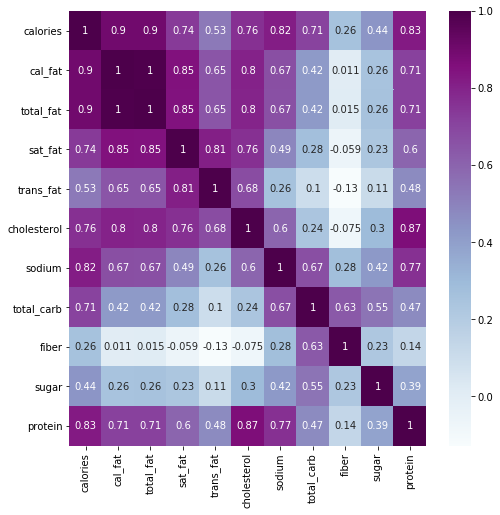

In [22]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap = "BuPu");

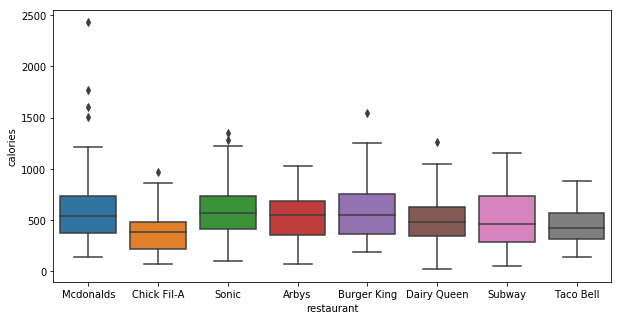

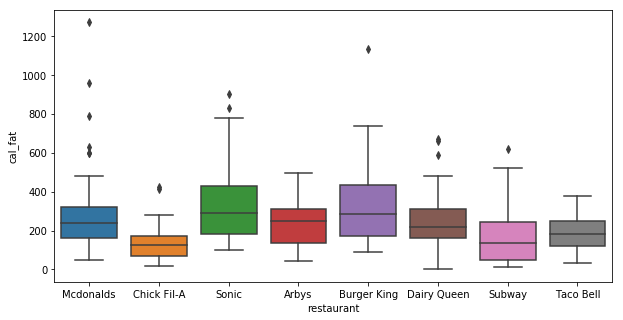

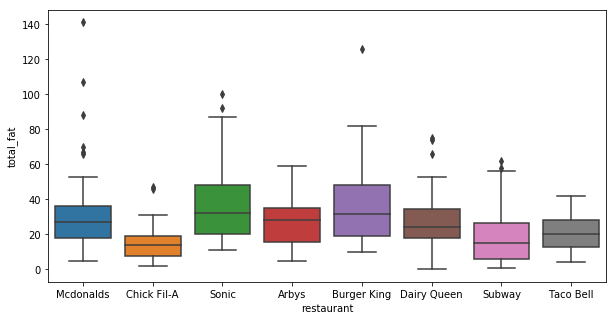

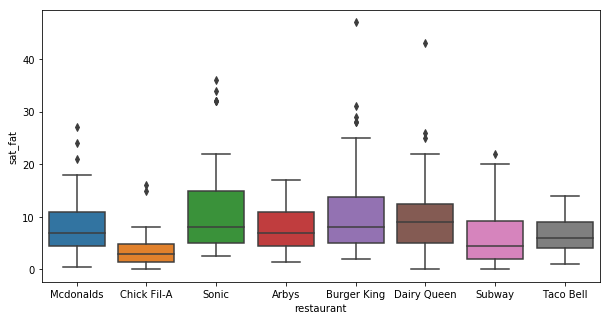

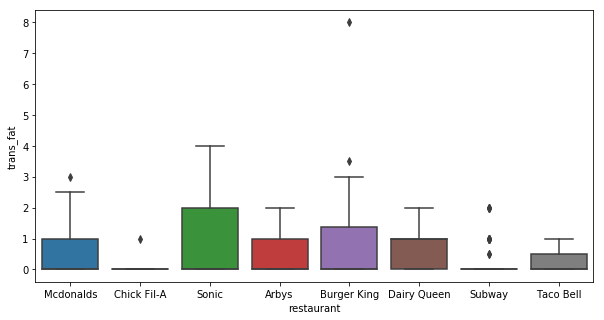

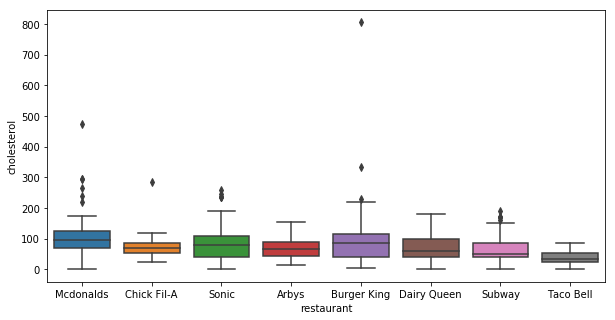

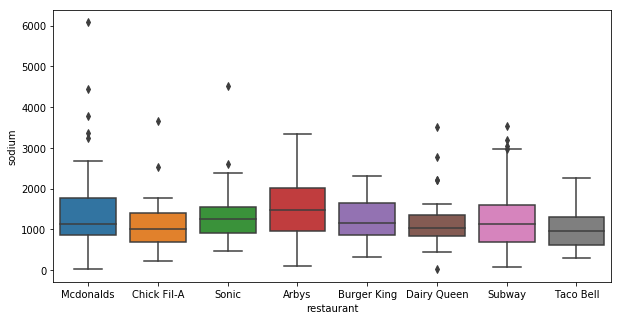

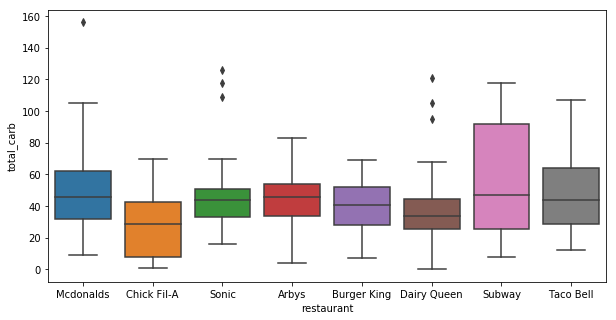

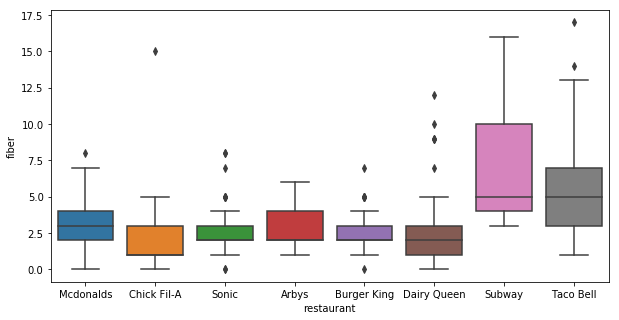

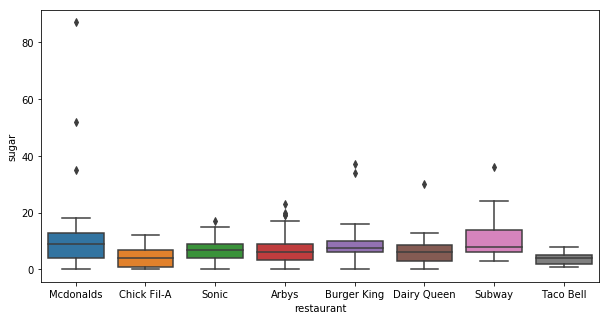

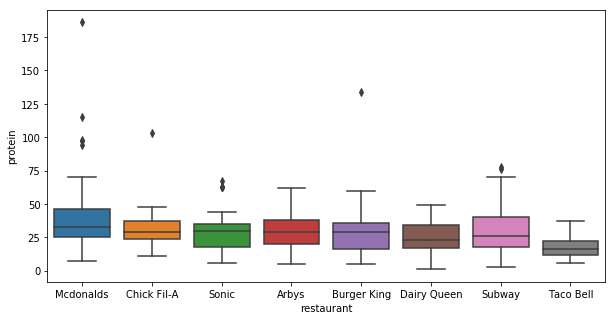

In [23]:
for col in df.columns[1:]:
    plt.figure(figsize = (10,5))
    sns.boxplot(x = "restaurant" , y = col, data = df)
    plt.show()

### IQR İLE OUTLİERS TEMİZLEME SHAPE (415,12)

In [24]:
for col in df.columns[1:]:
    for rest in df["restaurant"].unique():
        selected_rest = df[df["restaurant"] == rest]
        selected_column = selected_rest[col]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        iqr = q3-q1
        
        minimum = q1 - (iqr*1.5)
        maximum = q3 + (iqr*1.5)
        
        max_indexes = df[(df["restaurant"] == rest) & (df[col] > maximum)].index
        min_indexes = df[(df["restaurant"] == rest) & (df[col] < minimum)].index
        
        df.drop(index = max_indexes)
        df.drop(index = min_indexes)        

In [25]:
df.shape

(515, 12)

### STD İLE OUTLİERS TEMİZLEME SHAPE (479,12)

In [26]:
for col in df.columns[1:]:
    for rest in df["restaurant"].unique():
        selected_rest = df[df["restaurant"] == rest]
        selected_column = selected_rest[col]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (3*std)
        three_sigma_minus = avg - (3*std)
        
        outliers = selected_column[(selected_rest[col] > three_sigma_plus) | (selected_rest[col] < three_sigma_minus)].index
        df.drop(index = outliers, inplace = True)

In [27]:
# iqr yöntemi ile çok fazla veri atılacağı için std yöntemini tercih ettim
df.shape

(479, 12)

In [28]:
df.reset_index(drop=True)

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0
1,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0
2,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0
3,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0
4,Mcdonalds,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
474,Taco Bell,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0
475,Taco Bell,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0
476,Taco Bell,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0
477,Taco Bell,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0


### LOF

In [29]:
from sklearn.neighbors import LocalOutlierFactor

In [30]:
df_numeric = df.iloc[:,1:]
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1) 
clf.fit_predict(df_numeric)
df_scores = clf.negative_outlier_factor_ 
np.sort(df_scores)[0:10] 

array([-3.07686695, -2.98228121, -2.29890794, -2.19264166, -2.16425341,
       -2.15278488, -2.08726635, -2.06631373, -2.01800844, -1.99865264])

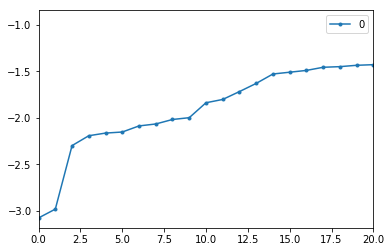

In [31]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim = [0,20], style=".-")
plt.show()

In [32]:
threshold = np.sort(df_scores)[1]
df = df[df_scores > threshold]

In [33]:
df.shape

(477, 12)

In [34]:
df.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0
1,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0
3,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0
4,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0
5,Mcdonalds,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0


In [35]:
df.reset_index(drop = True)

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0
1,Mcdonalds,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0
2,Mcdonalds,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0
3,Mcdonalds,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0
4,Mcdonalds,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
472,Taco Bell,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0
473,Taco Bell,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0
474,Taco Bell,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0
475,Taco Bell,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0


In [36]:
y = df["restaurant"]
X = df.drop("restaurant", axis = 1)

In [37]:
y = LabelEncoder().fit_transform(y)

In [38]:
X = StandardScaler().fit_transform(X)

### Random Forest Model : 0.72

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [41]:
model = RandomForestClassifier(random_state = 42).fit(X_train, y_train)

In [42]:
y_preds = model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[ 5  1  1  1  2  1  0  0]
 [ 1 10  2  0  0  0  1  0]
 [ 2  0  4  0  0  1  0  0]
 [ 1  2  0  3  1  0  0  1]
 [ 1  2  1  0 11  0  1  0]
 [ 2  3  0  3  0  7  0  0]
 [ 0  0  1  0  1  0 17  0]
 [ 0  1  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.42      0.45      0.43        11
           1       0.53      0.71      0.61        14
           2       0.44      0.57      0.50         7
           3       0.43      0.38      0.40         8
           4       0.73      0.69      0.71        16
           5       0.78      0.47      0.58        15
           6       0.89      0.89      0.89        19
           7       0.97      0.97      0.97        30

    accuracy                           0.72       120
   macro avg       0.65      0.64      0.64       120
weighted avg       0.73      0.72      0.72       120



In [43]:
# Dengesiz bir veri seti olduğu için gözlem birimi az olan sınıfların doğruluğu düşük çıktı
# Smote ile veri setimi daha dengeli hale getirdim

In [44]:
!pip install imbalanced-learn

In [45]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [46]:
smt = SMOTE(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

### Random Forest Model : 0.92

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,random_state=42)

In [48]:
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [49]:
y_preds = model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[22  0  1  0  0  0  0  0]
 [ 0 26  0  1  1  1  0  1]
 [ 0  0 37  0  0  0  0  0]
 [ 0  0  1 18  0  0  0  0]
 [ 1  0  1  0 27  0  0  0]
 [ 1  1  0  1  2 20  0  1]
 [ 0  0  1  0  1  0 35  0]
 [ 1  0  0  0  0  1  0 25]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.96      0.87      0.91        30
           2       0.90      1.00      0.95        37
           3       0.90      0.95      0.92        19
           4       0.87      0.93      0.90        29
           5       0.91      0.77      0.83        26
           6       1.00      0.95      0.97        37
           7       0.93      0.93      0.93        27

    accuracy                           0.92       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.92      0.92      0.92       228

0.9210526315789473


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### KNN : 0.76

In [51]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [52]:
y_preds = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[17  0  2  3  0  1  0  0]
 [ 0 14  3  2  2  5  1  3]
 [ 1  0 36  0  0  0  0  0]
 [ 0  0  0 18  0  1  0  0]
 [ 4  1  2  0 21  0  1  0]
 [ 2  2  0  2  0 19  0  1]
 [ 3  2  0  0  5  0 27  0]
 [ 1  3  0  1  0  1  0 21]]
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        23
           1       0.64      0.47      0.54        30
           2       0.84      0.97      0.90        37
           3       0.69      0.95      0.80        19
           4       0.75      0.72      0.74        29
           5       0.70      0.73      0.72        26
           6       0.93      0.73      0.82        37
           7       0.84      0.78      0.81        27

    accuracy                           0.76       228
   macro avg       0.75      0.76      0.75       228
weighted avg       0.76      0.76      0.75       228

0.7587719298245614


### SVC : 0.76

In [53]:
svm_model = SVC(random_state=42).fit(X_train,y_train)

In [54]:
y_preds = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[17  3  0  0  1  2  0  0]
 [ 3 14  2  4  2  4  0  1]
 [ 2  0 35  0  0  0  0  0]
 [ 0  0  0 17  0  1  0  1]
 [ 3  0  4  2 18  1  1  0]
 [ 0  2  0  4  4 15  0  1]
 [ 1  1  0  0  2  0 33  0]
 [ 0  0  0  1  0  2  0 24]]
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        23
           1       0.70      0.47      0.56        30
           2       0.85      0.95      0.90        37
           3       0.61      0.89      0.72        19
           4       0.67      0.62      0.64        29
           5       0.60      0.58      0.59        26
           6       0.97      0.89      0.93        37
           7       0.89      0.89      0.89        27

    accuracy                           0.76       228
   macro avg       0.74      0.75      0.74       228
weighted avg       0.76      0.76      0.75       228

0.7587719298245614


### MLPC : 0.80

In [55]:
mlpc_model = MLPClassifier(random_state=42).fit(X_train,y_train)

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [56]:
y_preds = mlpc_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[16  4  0  3  0  0  0  0]
 [ 0 18  0  3  4  4  0  1]
 [ 0  0 37  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  2]
 [ 2  1  0  2 23  0  1  0]
 [ 2  0  0  0  7 16  0  1]
 [ 0  0  1  0  4  0 32  0]
 [ 0  0  0  1  1  1  0 24]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.78      0.60      0.68        30
           2       0.97      1.00      0.99        37
           3       0.65      0.89      0.76        19
           4       0.59      0.79      0.68        29
           5       0.76      0.62      0.68        26
           6       0.97      0.86      0.91        37
           7       0.86      0.89      0.87        27

    accuracy                           0.80       228
   macro avg       0.80      0.79      0.79       228
weighted avg       0.82      0.80      0.80       228

0.8026315789473685


### GBM : 0.85

In [57]:
gbm_model = GradientBoostingClassifier(random_state=42).fit(X_train,y_train)

In [58]:
y_preds = gbm_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[20  1  1  1  0  0  0  0]
 [ 1 22  1  0  3  3  0  0]
 [ 0  0 35  0  1  1  0  0]
 [ 0  0  0 15  1  2  0  1]
 [ 2  2  0  0 24  0  1  0]
 [ 0  0  1  1  2 21  0  1]
 [ 1  0  0  2  3  0 30  1]
 [ 0  0  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.88      0.73      0.80        30
           2       0.92      0.95      0.93        37
           3       0.79      0.79      0.79        19
           4       0.71      0.83      0.76        29
           5       0.78      0.81      0.79        26
           6       0.97      0.81      0.88        37
           7       0.90      1.00      0.95        27

    accuracy                           0.85       228
   macro avg       0.85      0.85      0.84       228
weighted avg       0.86      0.85      0.85       228

0.8508771929824561


### XGB : 0.89

In [59]:
xgb_model = XGBClassifier(random_state=42).fit(X_train,y_train)

In [60]:
y_preds = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[21  0  1  1  0  0  0  0]
 [ 1 23  1  0  1  3  0  1]
 [ 0  0 37  0  0  0  0  0]
 [ 0  0  0 17  0  1  0  1]
 [ 2  1  1  0 25  0  0  0]
 [ 0  1  0  2  1 21  0  1]
 [ 0  0  1  1  3  0 32  0]
 [ 0  0  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.92      0.77      0.84        30
           2       0.90      1.00      0.95        37
           3       0.81      0.89      0.85        19
           4       0.83      0.86      0.85        29
           5       0.84      0.81      0.82        26
           6       1.00      0.86      0.93        37
           7       0.90      1.00      0.95        27

    accuracy                           0.89       228
   macro avg       0.89      0.89      0.88       228
weighted avg       0.89      0.89      0.89       228

0.8903508771929824


### Decision Tree : 0.73

In [61]:
decision_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [62]:
y_preds = decision_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[14  4  0  1  1  3  0  0]
 [ 1 21  1  1  1  4  0  1]
 [ 3  4 27  0  2  1  0  0]
 [ 1  0  1 15  0  1  0  1]
 [ 4  1  1  0 20  3  0  0]
 [ 1  0  2  1  2 19  0  1]
 [ 0  0  2  0  5  0 30  0]
 [ 1  1  0  2  0  1  2 20]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        23
           1       0.68      0.70      0.69        30
           2       0.79      0.73      0.76        37
           3       0.75      0.79      0.77        19
           4       0.65      0.69      0.67        29
           5       0.59      0.73      0.66        26
           6       0.94      0.81      0.87        37
           7       0.87      0.74      0.80        27

    accuracy                           0.73       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.74      0.73      0.73       228

0.7280701754385965


### RF Tuned Model : 0.89

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
rf_params = {"max_depth" : [5,8,10], 
             "max_features" : [2,5,8], "n_estimators" : [10,500,700,1000], "min_samples_split" : [2,5,10]}

In [65]:
rf_model = RandomForestClassifier(random_state=42)
rf_cv_model = GridSearchCV(rf_model, rf_params,cv = 10, verbose = 2)

In [66]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=10; tota

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 700, 1000]},
             verbose=2)

In [67]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 700}

In [68]:
rf_tuned_model = RandomForestClassifier(max_depth= 10, max_features= 2, min_samples_split= 2, n_estimators= 700,random_state = 42)
rf_tuned_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=2, n_estimators=700,
                       random_state=42)

In [69]:
y_preds = rf_tuned_model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test,y_preds))

[[21  1  1  0  0  0  0  0]
 [ 1 23  1  1  2  1  0  1]
 [ 0  0 37  0  0  0  0  0]
 [ 0  0  1 17  0  0  0  1]
 [ 1  0  1  0 27  0  0  0]
 [ 1  0  1  1  2 20  0  1]
 [ 0  0  1  0  2  0 34  0]
 [ 1  0  0  0  0  1  0 25]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.96      0.77      0.85        30
           2       0.86      1.00      0.92        37
           3       0.89      0.89      0.89        19
           4       0.82      0.93      0.87        29
           5       0.91      0.77      0.83        26
           6       1.00      0.92      0.96        37
           7       0.89      0.93      0.91        27

    accuracy                           0.89       228
   macro avg       0.90      0.89      0.89       228
weighted avg       0.90      0.89      0.89       228

0.8947368421052632


In [71]:
Importance = pd.DataFrame({"Importance" : rf_tuned_model.feature_importances_*100}, index = df.columns[1:])

Text(0.5, 0, 'Değişken Önem Düzeyleri')

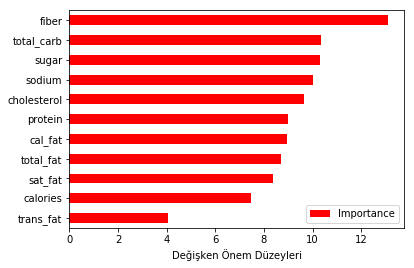

In [72]:
Importance.sort_values(by="Importance", axis =0, ascending = True).plot(kind = "barh", color = "r");
plt.xlabel("Değişken Önem Düzeyleri")